# PRDM9, the red queen in the kingdom of recombination

### Laboratoire de biomètrie et de biologie Evolutive (LBBE), Lyon, France



*The GitHub repository hosting this paper is available [**here**](https://github.com/ThibaultLatrille/RedQueen).*

## Introduction

PRDM9 is a meiosis-specific histone methyltransferase with a tandem-repeat zinc finger (ZnF) domain encoded by a minisatellite-like sequence. The ZnF domain is polymorphic in repeat number and type, and appears to be directly responsible for activating hotspots by binding to hotspot-associated sequence motifs in both humans and mice.

Hotspots evolve rapidly, as shown by the totally different fine-scale recombination landscapes of humans and chimpanzees.
Turnover might be driven by the tendency of hotspots to self-destruct through the systematic overtransmission of variants within hotspots that downregulate recombination initiation, leading to hotspot depletion and consequent selection in favor of PRDM9 variants that activate new sets of hotspots.

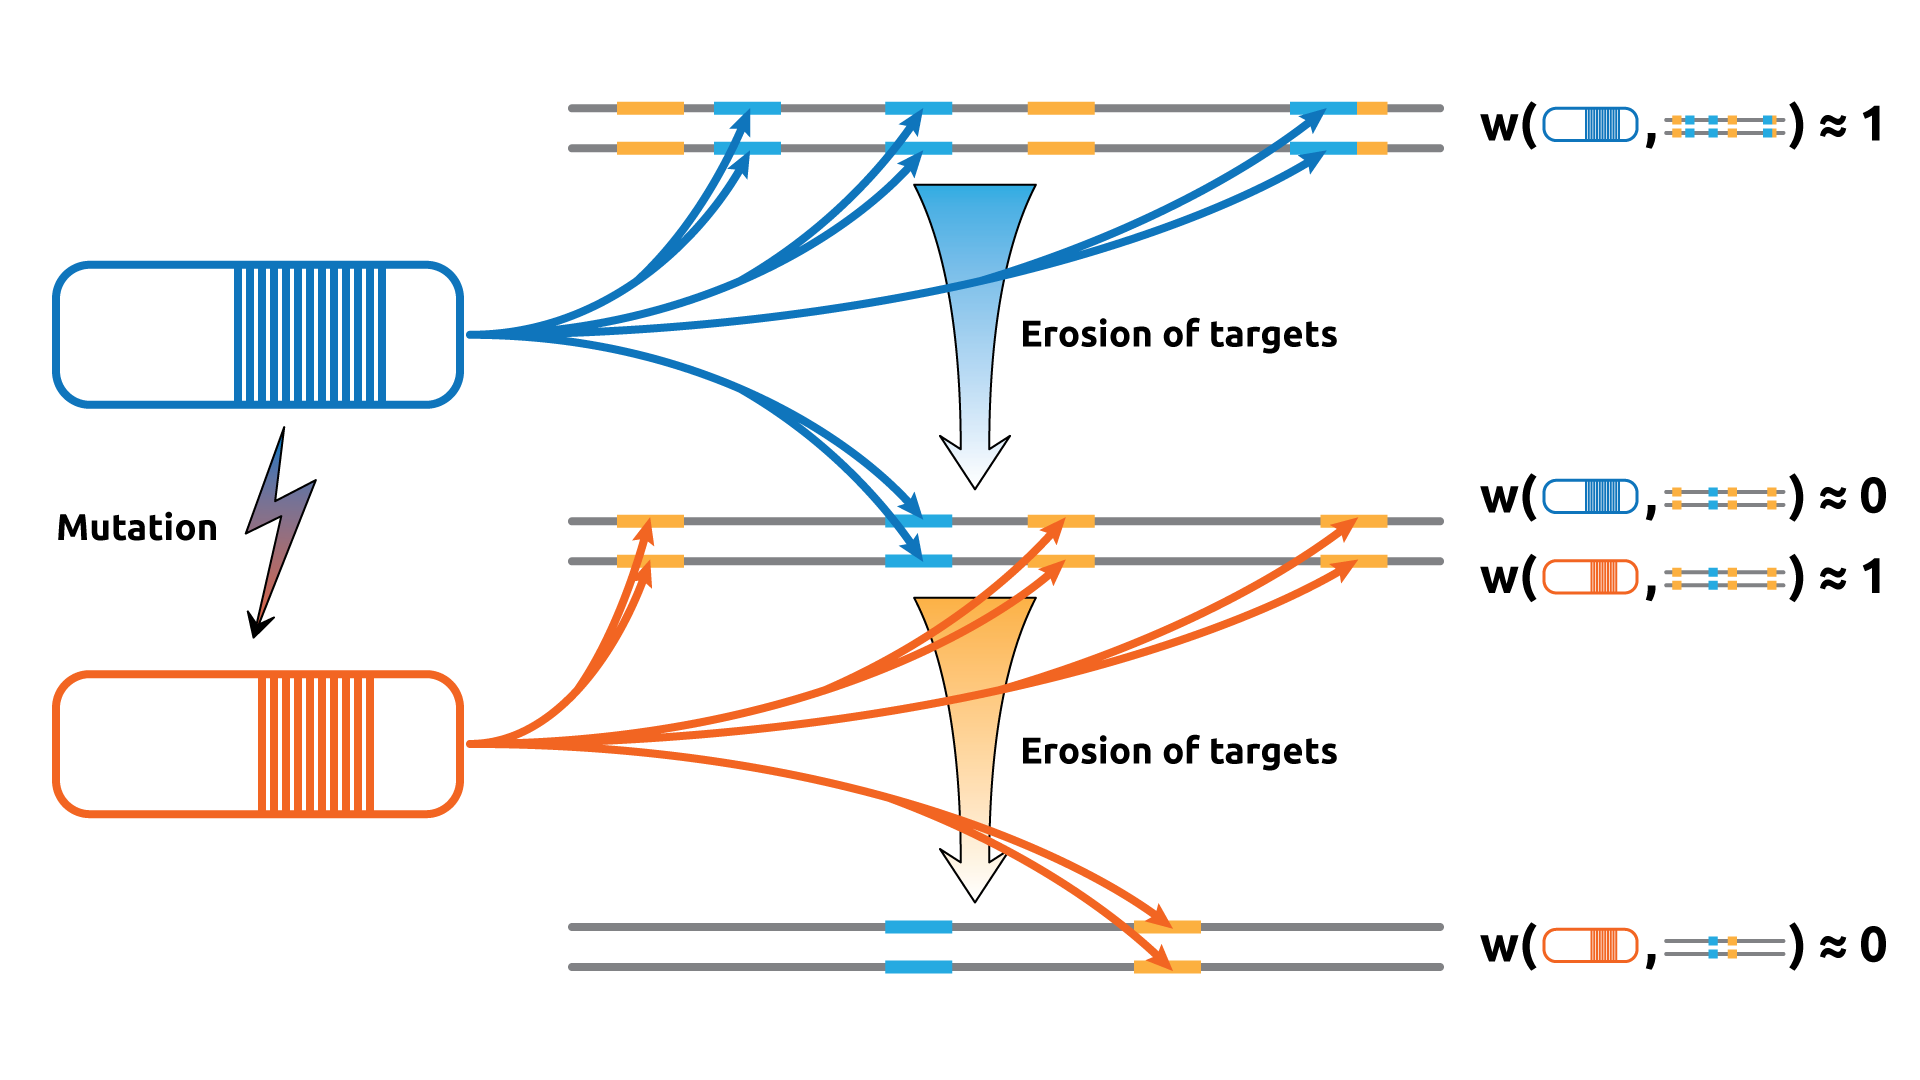

In [3]:
from IPython.display import Image
Image(filename='Images/RedQueen.png') 

## Definition

We derived a mathematic population genetic model, implemented numerically by monte carlo simulations.

The population is composed of $N_\mathrm{e}$ diploid indivuals, kept constant over time.

The locus PRDM9 mutates at constant rate $u$ per generation per locus and each new variant binds a new sets of sequence targets. Thus $u$ can be understood as a fonctionnal mutation rate, with each mutation producing a new PRDM9 variant with new hotspots.
The sequence targets of PRDM9 mutates at constant rate $v$ per generation. The sequence targets recombine at constant rate $r_0$ per generation. The recombination at the sequence target is favored by the binding of PRDM9.

At each generation, $K$ is the number of PRDM9 variants in the population. $\forall i \in \{ 1, \, \dots, \, K \}$, $n_i$ is the number of $i^{th}$ PRDM9 variant in the population. Consequently, $x_i = n_i / 2 N_\mathrm{e}$ is the frequency of the $i^{th}$ PRDM9 variant.
For each variant, $L_i$ is the overall erosion of the sequence targets, with $L_i=1$ meaning no erosion and $L_i=0$ meaning totally eroded. $\bar{\omega_i}$ is fitness of this variant. At the population level, $\bar{\omega}=\sum_{i} x_i \bar{\omega_i}$ is the mean fitness.


We propose $\bar{\omega_i}=\sum_j x_j f \left( \tfrac{L_i + L_j}{2} \right)$, for any function $f\colon [0,1] \rightarrow \mathbb{R}^+$. Meaning the fitness of variant $i$ is the sum over the probabililies that the second variant is $j$ (diploid individuals) time a function of the mean erosion between variant $i$ and $j$. Thus we assume the variants interact linearly.

## Discret stochastic modeling of the red queen

We consider that PRDM9 is activating it's target in *trans*, meaning there is no linkage between the locus of PRDM9 and any of the target. In our simulation, we keep track of the number of PRDM9 variants $K$, the number of individuals belonging to each variant of PRDM9 ($n_i$). For each variant we keep track the overall erosion of it's targets in the population ($L_i$).

For each new generation, the simulation is decomposed in three steps, computed in the following order: 

1. Creation of new variants of PRDM9
2. Erosion of the hotspots
3. Drift and selection

### 1. Mutation and creation of new variants

Per locus, PRDM9 mutates at constant rate $u$, and we have $2 N_\mathrm{e}$ loci in the population. Thus the number of new variants is Poission distributed with mean $2 N_\mathrm{e} u$. the new variants are introduced in the population at a frequency $1 / 2 N_\mathrm{e}$

\begin{equation}
  K(t+1) - K(t) \sim \operatorname{Pois} \left(2 N_\mathrm{e} u \right)
\end{equation}


### 2. Erosion of the hotspots

PRDM9 activates it's targets in *trans*. The number of new mutation occuring in the population at the targets is $2 N_\mathrm{e} v$, each of them are driven by a selection coefficient $2 r _0  x_i$, where $x_i$ is the probabity of activation by the variant $i$.
Since the strenght of erosion is proportionnal to the targets being not eroded, we model the erosion as an exponential decay.

\begin{equation}
 L_i (t+1) =  L_i (t)\operatorname{exp} \left( - 2 N_\mathrm{e} v
 \dfrac{1 - \operatorname{e}^{2 r _0  x_i}}{1 - \operatorname{e}^{4 N_\mathrm{e} r _0  x_i}} \right), \;
 \forall i \in \{ 1, \, \dots, \, K \}
\end{equation}

### 3. Drift and selection

The new generation of $2 N_\mathrm{e}$ PRDM9 alleles is drawn from a multinomial distribution, generating a drift. The probability of drawing variant $i$ is equal to it's frequency $x_i$ time it's relative fitness  $\tfrac{\bar{\omega_i}}{\bar{\omega}}$. The probabilities sum to $1$ by definition of $\bar{\omega}$.

\begin{equation}
  \left(
  n_1(t+1), \,
  \dots, \,
  n_i(t+1), \,
  \dots, \,
  n_{N_\mathrm{e}}(t+1)
  \right)
  \sim \operatorname{Multinomial} \left(2 N_\mathrm{e}, \,
  \dfrac{x_1  \bar{\omega_1}}{\bar{\omega}}, \,
  \dots, \,
  \dfrac{x_i  \bar{\omega_i}}{\bar{\omega}}, \,
  \dots, \,
  \dfrac{x_{N_\mathrm{e}} \bar{\omega_{N_\mathrm{e}}}}{\bar{\omega}}
  \right)
\end{equation}


## Continuous stochastic modeling of the red queen

We also derived a set of equation for a model with continuous time, with time scaled such that $2 N_\mathrm{e}\mathrm{d}t=1$.

Let

$\bullet \; \mu=2 N_\mathrm{e} u$

$\bullet \; \nu=2 N_\mathrm{e} v$

$\bullet \; \rho_0=4 N_\mathrm{e} r_0$

$\bullet \; f=f^{\alpha}$

$\bullet \; \alpha=\alpha_0 / 2N_\mathrm{e}$

$\bullet \; \bar{L}=\sum_i x_i L_i$

\begin{equation}
  \left\{
      \begin{aligned}
        \dfrac{\mathrm{d}L_i}{\mathrm{d}t} &= 
        - \nu \dfrac{\rho_0 x_i}{1 - \operatorname{e}^{- \rho_0  x_i}}L_i, \;
             \forall i \in \{ 1, \, \dots, \, K \} \\
        \dfrac{\mathrm{d}x_i}{\mathrm{d}t} &= \alpha_0 \dfrac{f'(\bar{L})}{f(\bar{L})} \left[ \tfrac{L_i - \bar{L}}{2} \right]x_i , \;
         \forall i \in \{ 1, \, \dots, \, K \}\\
        \dfrac{\mathrm{d}K}{\mathrm{d}t} &=
        \mu \alpha_0 \dfrac{f'(\bar{L})}{f(\bar{L})} [1 - \bar{L} ] \\
      \end{aligned}
    \right.
\end{equation}

## Appendix 1. Linearization of the fitness

Let us denote $\bar{L}=\sum_i x_i L_i$, one can use a Taylor approximation to linearize the fitness function.  

\begin{equation}
  \begin{aligned}
    \bar{\omega_i} - f(\bar{L}) &=
    \sum_j x_j f \left( \tfrac{L_i + L_j}{2} \right) - \sum_j x_j f(\bar{L}) \\
    &=
    \sum_j x_j  \left[ f \left( \tfrac{L_i + L_j}{2} \right) - f(\bar{L}) \right] \\
    &\simeq
    \sum_j x_j  f'(\bar{L}) \left( \tfrac{L_i + L_j}{2} - \bar{L} \right) \\
    &\simeq
     f'(\bar{L}) \left( \tfrac{L_i + \sum_j x_j L_j}{2} - \bar{L} \right) \\
     &\simeq
     f'(\bar{L}) \left( \tfrac{L_i - \bar{L}}{2}\right) \\
  \end{aligned}
\end{equation}

Consequently $\bar{\omega} = f(\bar{L})$. *Proof*,

\begin{equation}
  \begin{aligned}
    \bar{\omega} - f(\bar{L}) &=
    \sum_i x_i (\bar{\omega_i} - f(\bar{L}) ) \\
    &\simeq
    \sum_i x_i \,  f'(\bar{L}) \left( \tfrac{L_i - \bar{L}}{2}\right) \\
    &\simeq
     f'(\bar{L}) \left( \tfrac{\sum_i x_i L_i - \bar{L}}{2}\right) \\
    &\simeq
     0
  \end{aligned}
\end{equation}

And the selection coefficient $s_i$ for the variant $i$ can be easily computed  

\begin{equation}
    s_i = \dfrac{\bar{\omega_i} - \bar{\omega}}{\bar{\omega}}
    \simeq \dfrac{f'(\bar{L})}{2f(\bar{L})} [ L_i - \bar{L} ] 
\end{equation}

## Appendix 2. Linearization of the power fitness

Let us denote $\bar{L}=\sum_i x_i L_i$. 

\begin{equation}
  \begin{aligned}
    \bar{\omega_i} - f^{\alpha}(\bar{L}) &=
    \sum_j x_j f^{\alpha} \left( \tfrac{L_i + L_j}{2} \right) - \sum_j x_j f^{\alpha}(\bar{L}) \\
    &=
    \sum_j x_j  \left[ f^{\alpha} \left( \tfrac{L_i + L_j}{2} \right) - f^{\alpha}(\bar{L}) \right] \\
    &\simeq
    \sum_j  x_j \, \alpha  f'(\bar{L}) f^{\alpha-1}(\bar{L}) \left( \tfrac{L_i + L_j}{2} - \bar{L} \right) \\
    &\simeq
    \alpha f^{\alpha-1}(\bar{L}) f'(\bar{L}) \left( \tfrac{L_i + \sum_j x_j L_j}{2} - \bar{L} \right) \\
     &\simeq
    \alpha f^{\alpha-1}(\bar{L}) f'(\bar{L}) \left( \tfrac{L_i - \bar{L}}{2}\right) \\
  \end{aligned}
\end{equation}

Consequently $\bar{\omega} = f(\bar{L})$. *Proof*,

\begin{equation}
  \begin{aligned}
    \bar{\omega} - f^{\alpha}(\bar{L}) &=
    \sum_i x_i (\bar{\omega_i} - f^{\alpha}(\bar{L}) ) \\
    &\simeq
    \sum_i x_i \, \alpha f^{\alpha-1}(\bar{L}) f'(\bar{L}) \left( \tfrac{L_i - \bar{L}}{2}\right) \\
    &\simeq
    \alpha f^{\alpha-1}(\bar{L}) f'(\bar{L}) \left( \tfrac{\sum_i x_i L_i - \bar{L}}{2}\right) \\
    &\simeq
     0
  \end{aligned}
\end{equation}

And the selection coefficient $s_i$ for the variant $i$ can be easily computed  

\begin{equation}
    s_i = \dfrac{\bar{\omega_i} - \bar{\omega}}{\bar{\omega}}
    \simeq \alpha \dfrac{f'(\bar{L})}{2f(\bar{L})} [ L_i - \bar{L} ] 
\end{equation}